<a href="https://colab.research.google.com/github/siqueirago/Analisando-textos-com-Languege-Studio-Azure/blob/main/Cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

--2024-09-24 12:11:34--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.207, 142.250.152.207, 173.194.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   135MB/s    in 0.5s    

2024-09-24 12:11:35 (135 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/do

In [2]:
!rm -rf cats_and_dogs_filtered.zip

In [3]:
!pip install tensorflow keras numpy matplotlib

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Cria um objeto ImageDataGenerator para aumentar os dados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

# Carrega os dados de treinamento
train_generator = train_datagen.flow_from_directory(
    "dados/train",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Altere para 'categorical' se tiver mais de duas classes
)

# Carrega os dados de validação (similar ao treinamento)
validation_generator = train_datagen.flow_from_directory(
    'dados/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'

)

FileNotFoundError: [Errno 2] No such file or directory: 'dados/train'

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(2)
])

In [ ]:
# Define the optimizer, loss function, and metrics
model.compile(optimizer='adam', # You can change the optimizer if needed
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Now you can train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

In [ ]:
# Cria um objeto ImageDataGenerator para os dados de teste
# (apenas redimensionamento)
test_datagen = ImageDataGenerator(rescale=1./255)

# Carrega os dados de teste
test_generator = test_datagen.flow_from_directory(
    'dados/test',  # Substitua pelo caminho da sua pasta de teste
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Altere para 'categorical' se tiver mais de duas classes
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Carregar uma nova imagem
img = tf.keras.preprocessing.image.load_img('dados/imagem.jpg', target_size=(150, 150))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Fazer a predição
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Função para carregar e pré-processar uma imagem
def load_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)  # Converte em array
    img_array = np.expand_dims(img_array, axis=0)  # Adiciona uma dimensão extra (batch)
    img_array /= 255.  # Normaliza os valores para o intervalo [0,1]
    return img_array

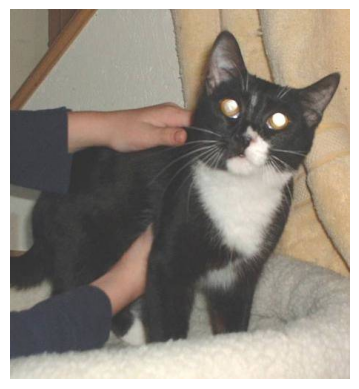

In [ ]:
# Caminho para a imagem de teste
image_path = 'dados/validation/cats/cat.2000.jpg'  # Altere para o caminho da imagem que deseja visualizar

# Carregar e exibir a imagem
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

In [ ]:
# Importar as bibliotecas necessárias
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Caminho para a imagem de teste
img_path = 'dados/validation/dogs/dog.2023.jpg'  # Altere para o caminho da imagem que deseja testar

# Carregar a imagem
img = image.load_img(img_path, target_size=(150, 150))  # Redimensiona para 150x150
img_array = image.img_to_array(img)  # Converte a imagem para um array
img_array = np.expand_dims(img_array, axis=0)  # Adiciona uma dimensão extra

# Normaliza a imagem
img_array /= 255.0

# Fazer a previsão
prediction = model.predict(img_array)

# Interpretar o resultado
if prediction[0][0] > prediction[0][1]:
    print("A imagem é um gato.")
else:
    print("A imagem é um cachorro.")

# Visualizar a imagem
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dados/validation/dogs/dog.2023.jpg'